<a href="https://colab.research.google.com/github/TobyM27/TugasIB_SL_DecisionTree/blob/main/TugasIB_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Kelompok Intelegensi Buatan RC - Supervised Learning Model 🤖
1.   Dias Morello Sembiring - 120140167
2.   Moratua Putra Pardede - 121140079
3.   Tobyanto Putra Mandiri - 121140099

Dataset yang akan digunakan pada tugas ini adalah dataset "Chess Game Dataset (Lichess)" yang dapat diakses dari tautan : [ sumber dataset](https://www.kaggle.com/datasets/datasnaek/chess/code?datasetId=2321&sortBy=commentCount&outputs=Visualization)

Analisis Datasetnya secara mendalam dan karakteristik-karakteristiknya.

Teknik Supervised Learning yang akan digunakan dalam tugas ini adalah *decision tree model*





---



\# Bagian ini berguna untuk melakukan upload dataset kaggle (yang sudah terunduh secara lokal) ke dalam google colab

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# Move the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving games.csv to games.csv
User uploaded file "games.csv" with length 7672655 bytes
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Analisis terhadap dataset chess (karakteristik dan fitur-fitur dari dataset ini)**


1. **Karakteristik Dataset:**
   - Dataset ini terdiri dari 20.000 baris dan 16 kolom.
   - Terdapat berbagai tipe data termasuk integer, float, dan string.
   - Dataset ini mencakup informasi tentang pertandingan catur, termasuk rating pemain, jumlah giliran, dan hasil pertandingan (pemenangnya).

2. **Fitur-fitur Utama:**
   - id: Identifikasi unik untuk setiap permainan.
   - rated: Menunjukkan apakah permainan ini terdaftar atau tidak.
   - created_at: Waktu pembuatan permainan.
   - last_move_at: Waktu terakhir pergerakan dalam permainan.
   - turns: Jumlah giliran dalam permainan.
   - victory_status: Status kemenangan ("outoftime", "resign", "mate", "draw").
   - winner: Pemenang permainan ("white", "black", "draw").
   - increment_code: Kode penambahan waktu untuk setiap gerakan.
   - white_id: ID pemain putih.
   - white_rating: Rating pemain putih.
   - black_id: ID pemain hitam.
   - black_rating: Rating pemain hitam.
   - moves: Daftar gerakan dalam notasi catur standar.
   - opening_eco: Kode ECO untuk pembukaan.
   - opening_name: Nama pembukaan catur.
   - opening_ply: Jumlah langkah pembukaan.

3. **Karakteristik Utama:**
   - Dataset ini berfokus pada data permainan catur, mencakup detail tentang pemain dan hasil pertandingan.
   - Terdapat informasi tentang rating pemain, waktu pergerakan, status kemenangan, dan banyak lagi.
   - Data ini cocok untuk analisis statistik, visualisasi, dan pembuatan model untuk memprediksi hasil permainan catur.

4. **Tantangan Potensial:**
   - Data ini mungkin memerlukan beberapa tahap pra-pemrosesan seperti mengubah data waktu ke format yang tepat, melakukan konversi tipe data, dan menangani data yang hilang jika ada.

5. **Tujuan Analisis:**
   - Analisis pada dataset ini dapat meliputi visualisasi distribusi rating pemain, membandingkan kinerja pemain putih dan hitam, memahami faktor-faktor yang mempengaruhi hasil permainan, dan memprediksi hasil permainan berdasarkan fitur-fitur yang ada.



\# Bagian ini berguna untuk mengimport library-library python yang dibutuhkan untuk membuat model decision tree.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

\# Bagian ini berguna untuk memuat dataset yang diperoleh dari kagle

In [ ]:
df = pd.read_csv('games.csv')

\# Dengan ketentuan dimana model ini berguna untuk memprediksi pemenang (putih, hitam, atau seri)

In [ ]:
X = df[['white_rating', 'black_rating', 'turns', 'opening_ply']]
y = df['winner']

\# Ubah variabel kategori 'pemenang' menjadi label numerik


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

\# Inisialisasi pada *decision tree classifier*

In [ ]:
clf = DecisionTreeClassifier()

\# Bagian ini untuk melatih model *decision tree*

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

\# Bagian ini untuk prediksi labels untuk set uji

In [ ]:
y_pred = clf.predict(X_test)

\# Bagian ini berguna untuk mengevaluasi model *decision tree* yang telah dibuat dengan hasil akurasi sebesar 61.32%

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 61.32%


\# Bagian ini berguna untuk membuat laporan *classification* dimana:


*   classification_report menghasilkan laporan teks yang menunjukkan metrik klasifikasi utama (presisi, perolehan, skor F1) untuk setiap kelas.
*   target_names adalah daftar nama kelas yang akan digunakan dalam laporan.

In [ ]:
target_names = ['White', 'Black', 'Draw']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print(classification_rep)

              precision    recall  f1-score   support

       White       0.62      0.61      0.62      1816
       Black       0.17      0.17      0.17       192
        Draw       0.65      0.66      0.65      2004

    accuracy                           0.61      4012
   macro avg       0.48      0.48      0.48      4012
weighted avg       0.61      0.61      0.61      4012



\# Bagian ini berguna untuk membuat visualisasi terhadap model *decision tree*

In [ ]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

\# Bagian ini berguna untuk membuat visualisasi tapi secara grafik.

*   plot_tree menghasilkan representasi grafis dari Pohon Keputusan.
*   feature_names menentukan nama fitur yang digunakan dalam model.
*   class_names memberikan nama kelas untuk visualisasi yang lebih baik.

Selain itu bagian ini menampilkan diagram pohon dengan node yang mewakili keputusan berdasarkan fitur dan cabang yang mewakili kemungkinan hasil.

Dengan menafsirkan aturan atau representasi grafis dari Pohon Keputusan, pengamat dapat memahami fitur mana yang penting dalam membuat prediksi dan bagaimana model mengambil keputusan.





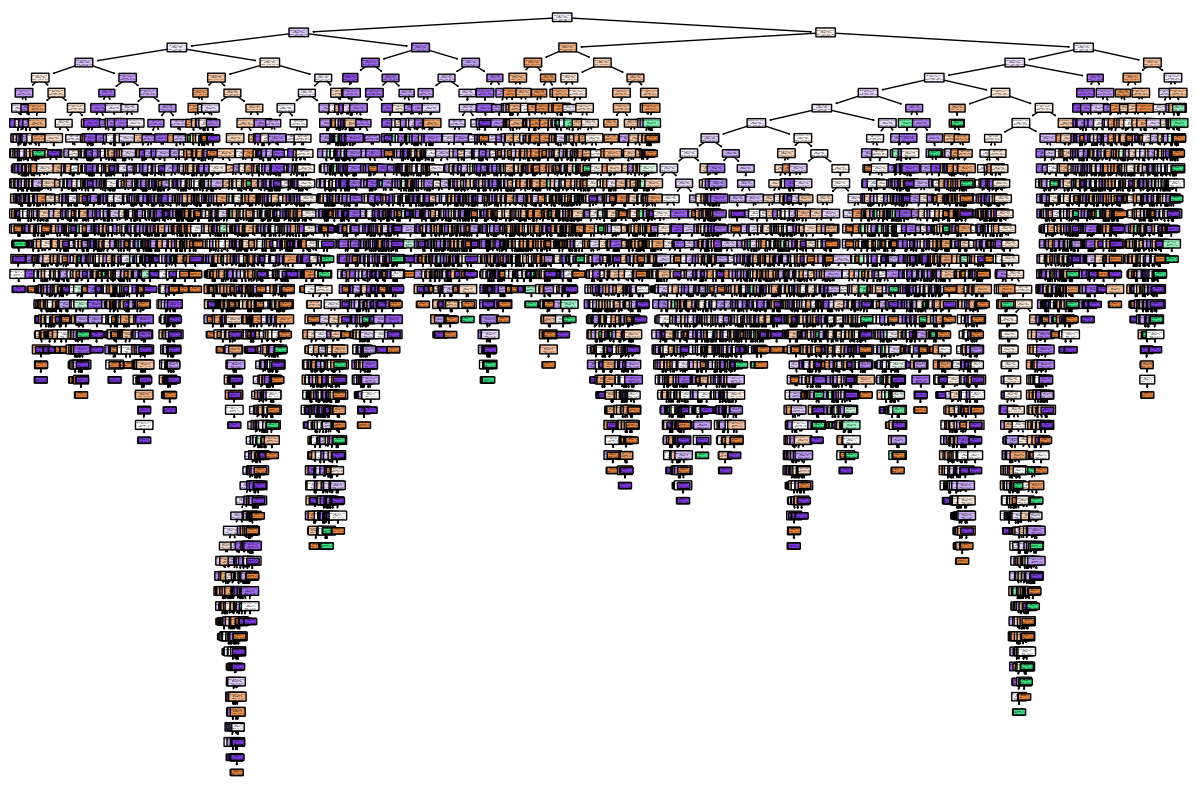

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=list(X.columns), class_names=target_names, filled=True, rounded=True)
plt.show()

\# Bagian ini berguna untuk optimisasi model *decision tree* dengan menetapkan *maximum depth* pada node dimana node maksnya ditetapkan 10.

Hasil yang diperoleh *Accuracy with max depth 10: 60.84%*

In [ ]:
max_depth = 10

clf = DecisionTreeClassifier(max_depth=max_depth)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max depth {max_depth}: {accuracy * 100:.2f}%")

Accuracy with max depth 10: 60.84%


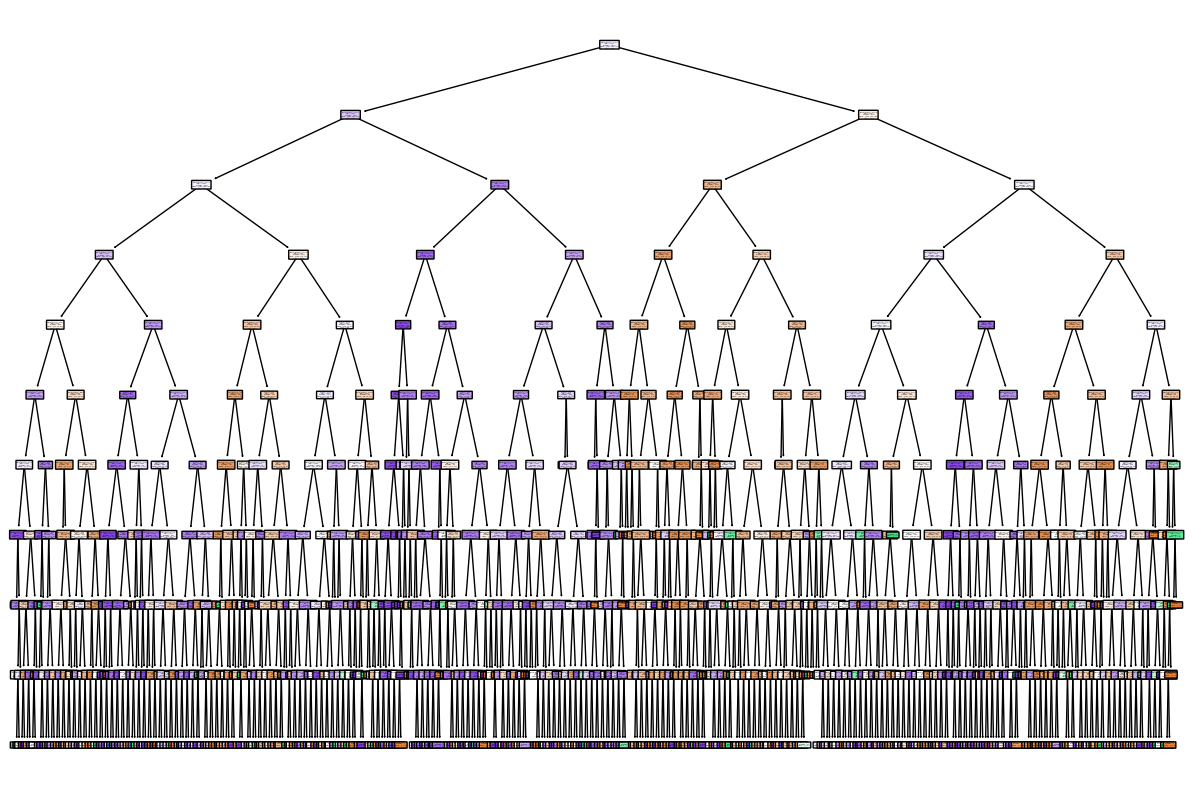

In [ ]:
clf_optimized = DecisionTreeClassifier(max_depth=max_depth)
clf_optimized.fit(X_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(clf_optimized, feature_names=list(X.columns), class_names=target_names, filled=True, rounded=True)
plt.show()

# Studi Pustaka terhadap *decision tree supervised learning model*

Pohon keputusan mewakili pengklasifikasi yang mengekspresikan partisi rekursif dari ruang *instance*[1]. Setelah itu, pohon keputusan terdiri dari simpul-simpul yang membentuk pohon akar, yang berarti pohon terdistribusi dengan simpul dasar / akar tanpa tepi masuk. Semua simpul lain memiliki tepi masuk yang tepat. Sedangkan untuk simpul yang memiliki tepi keluar disebut dengan simpul internal atau simpul uji. Sisa dari simpul-simpul disebut daun.

Dalam pohon keputusan, setiap simpul uji membagi ruang instance menjadi dua atau lebih sub-ruang sesuai dengan fungsi diskrit tertentu dari nilai-nilai input[1]. Dalam kasus terdapat beberapa atribut yang diuji, maka ruang *instance* dibagi berdasarkan nilai atribut tersebut. Dalam hal atribut numerik, kondisinya ini mengacu pada rentang. Selanjutnya, setiap daun ditugaskan ke satu kelas yang mewakili nilai target yang paling sesuai dan daun  juga dapat memiliki vektor probabilitas yang menunjukkan probabilitas dari atribut target memiliki nilai tertentu. Dalam kata lain, *Instance* dapat diklasifikasikan dengan mengikuti jalur dari akar pohon ke daun, sesuai dengan hasil dari uji di sepanjang jalur tersebut.[1]

Selain itu terdapat kekuatan dan kelemahan dari model supervised learning ini, berupa berikut ini:

**Kekuatan dari Decision Tree:**

1. **Interpretabilitas**: Decision Tree mudah diinterpretasikan karena representasi visualnya seperti alur keputusan yang dapat dimengerti dengan mudah. Ini memungkinkan pengambilan keputusan yang lebih intuitif.

2. **Mampu Menangani Data Campuran**: Decision Tree dapat menangani data campuran yang terdiri dari variabel kategorikal dan numerik tanpa perlu normalisasi atau preprocessing yang rumit.

3. **Tidak Memerlukan Asumsi Terhadap Distribusi Data**: Decision Tree tidak memerlukan asumsi terkait distribusi dari data. Ini bekerja baik dengan berbagai jenis data.

4. **Pengambilan Keputusan Cepat**: Proses prediksi pada Decision Tree dapat dilakukan dengan cepat karena hanya melibatkan serangkaian keputusan sederhana.

5. **Mampu Menangani Missing Values**: Decision Tree dapat menangani kasus di mana beberapa data hilang dengan memilih fitur terbaik untuk membagi data.

**Kelemahan dari Decision Tree:**

1. **Overfitting**: Decision Tree cenderung rentan terhadap overfitting, terutama jika tidak ada batasan pada pertumbuhan pohon atau jika terlalu banyak fitur yang digunakan.

2. **Tidak Stabil terhadap Perubahan Data**: Jika terjadi sedikit perubahan dalam data latih, pohon keputusan yang dihasilkan dapat berbeda secara signifikan. Hal ini dapat mengakibatkan kurangnya stabilitas dalam prediksi.

3. **Tidak Selalu Optimal**: Meskipun Decision Tree memilih fitur terbaik pada setiap node, tidak ada jaminan bahwa pohon keputusan tersebut akan menjadi model terbaik secara keseluruhan.

4. **Sensitif terhadap Data Noise**: Decision Tree dapat menghasilkan model yang sangat kompleks bahkan untuk data yang mungkin mengandung noise. Hal ini dapat menyebabkan model menjadi tidak general dan kurang dapat dipercaya.

5. **Keterbatasan untuk Menangani Variabel Kontinu**: Meskipun Decision Tree dapat bekerja dengan variabel kontinu, mereka sering kali tidak menghasilkan prediksi yang cukup akurat untuk jenis data ini tanpa beberapa bentuk preprosesing terlebih dahulu.

6. **Tidak Mendukung Transfer Learning**: Decision Tree tidak dapat memanfaatkan pengetahuan dari model sebelumnya. Setiap pelatihan harus dimulai dari awal.







# Daftar Pustaka

[1] V. Nasteski, “An overview of the supervised machine learning methods,” HORIZONS.B, vol. 4, pp. 51–62, 2017. doi:10.20544/horizons.b.04.1.17.p05